In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [14]:
''' Matplotlib customization, from class '''
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 12

## 0.2. Unit Conversions

In [6]:
# Conversion between kcal and MJ
MJ_per_kcal = 1 / 239
kcal_to_MJ = lambda kcal: kcal * MJ_per_kcal

# Conversion between MJ and kcal
MJ_to_kcal = lambda MJ: MJ / MJ_per_kcal

# Conversion b.w. mL of O2 burned and Megajoules (MJ)
liter_per_mL = 1 / 1000
kcal_per_liter = 4.7

# Define a function to convert volume (mL) of O2 burned to MJ
VO2_to_MJ = lambda mL: mL * liter_per_mL * kcal_to_MJ(kcal_per_liter)

## 0.3. Constants of the Model

In [10]:
# Energy density  [MJ / kg] of lean and fat mass
rho_L, rho_F = 7.6, 39.5

# Lean and fat mass of individual [kg]
# Assuming total mass of 80 kg with 20% body fat
vals0 = [64, 16]

# VO2_max → maximal oxygen uptake by muscles [mL/kg/min]
VO2_max = 40

In [22]:
# Defining the differential equations of the model
def deriv(t, pVO2m, u):
    ut = u(t)
    return -0.8 * pVO2m + 0.8 * ut

In [23]:
# Exercise intensity [ml/kg/min]
u = lambda t: 0.4 + 0.4 / 60 * t

# Starting exercise intensity [ml/kg/min]
pVO2m_ini = [0]

# Time to integrate over [day]
t = [0, 60]
t_eval = np.linspace(t[0], t[1], 300)

# Solve the system of differential equations
sol = solve_ivp(deriv, t, pVO2m_ini, args=[u], t_eval=t_eval)

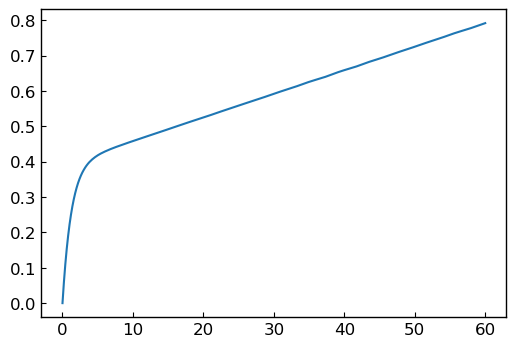

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(sol.t, sol.y[0])
plt.show()